Note: you may need to restart the kernel to use updated packages.
Анализ синего уровня:
Оптимальный порог для 20 вопросов: 19
Процент отсева слабых кандидатов: 60.83%


<Figure size 640x480 with 0 Axes>

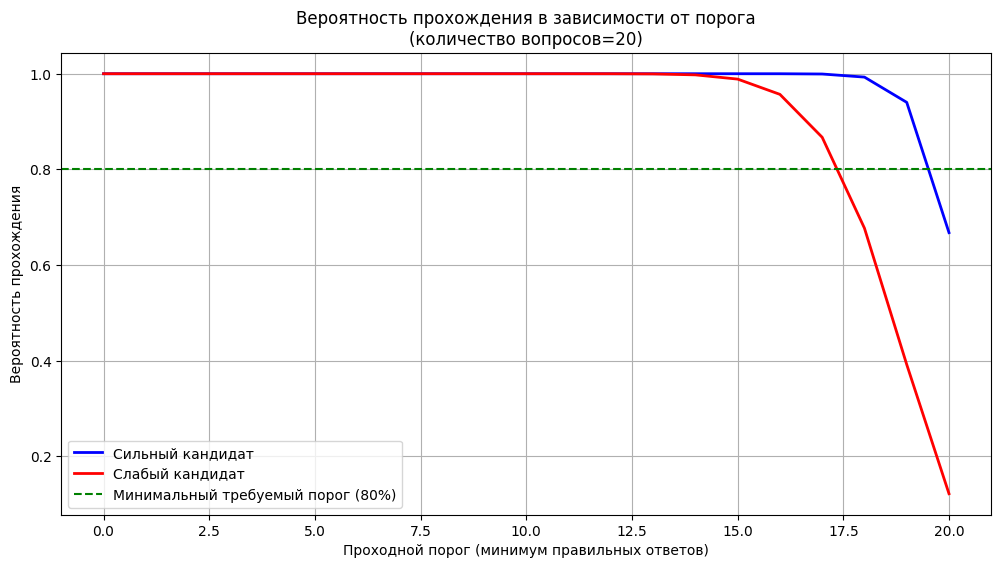


Анализ красного уровня:


<Figure size 640x480 with 0 Axes>

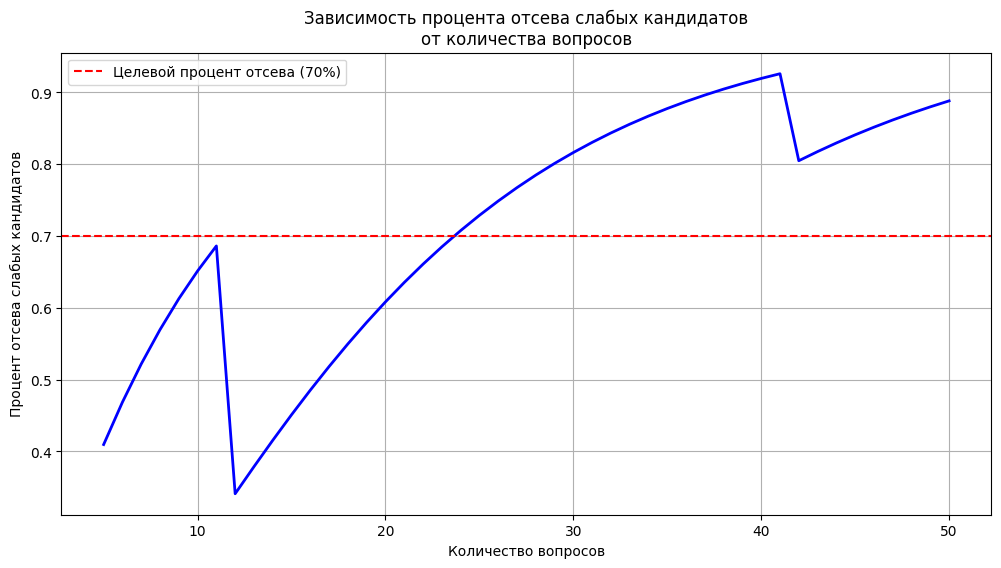


Анализ черного уровня - Сравнение уровней сложности:
          Сложность  Количество вопросов  Порог  Вероятность прохождения сильных  Процент отсева слабых
Проще, чем в работе                   24     23                         0.976146               0.707523
       Как в работе                   24     23                         0.917387               0.707523


In [3]:
%pip install numpy matplotlib seaborn scipy pandas 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
import pandas as pd



def calculate_pass_probability(n_questions, threshold, p_correct):
    """
    Рассчитывает вероятность прохождения теста при заданных параметрах:
    n_questions: количество вопросов
    threshold: минимальное количество правильных ответов для прохождения
    p_correct: вероятность правильного ответа на каждый вопрос
    """
    # Используем биномиальное распределение для расчета вероятности получить
    # threshold или более правильных ответов
    prob = 1 - sum(binom.pmf(k, n_questions, p_correct) 
                   for k in range(threshold))
    return prob

def plot_threshold_analysis(n_questions=20):
    """
    Строит график зависимости вероятности прохождения от порога
    для сильных и слабых кандидатов
    """
    # Вероятности для сложности "как в работе"
    p_strong = 0.98  # Сильный кандидат
    p_weak = 0.90    # Слабый кандидат
    
    пороги = range(n_questions + 1)
    вер_сильных = []
    вер_слабых = []
    
    for порог in пороги:
        вер_сильный = calculate_pass_probability(n_questions, порог, p_strong)
        вер_слабый = calculate_pass_probability(n_questions, порог, p_weak)
        вер_сильных.append(вер_сильный)
        вер_слабых.append(вер_слабый)
    
    plt.figure(figsize=(12, 6))
    plt.plot(пороги, вер_сильных, 'b-', label='Сильный кандидат', linewidth=2)
    plt.plot(пороги, вер_слабых, 'r-', label='Слабый кандидат', linewidth=2)
    plt.axhline(y=0.8, color='g', linestyle='--', label='Минимальный требуемый порог (80%)')
    
    plt.xlabel('Проходной порог (минимум правильных ответов)')
    plt.ylabel('Вероятность прохождения')
    plt.title(f'Вероятность прохождения в зависимости от порога\n(количество вопросов={n_questions})')
    plt.grid(True)
    plt.legend()
    return plt

def find_optimal_threshold(n_questions):
    """
    Находит оптимальный порог, обеспечивающий:
    1. Вероятность прохождения сильным кандидатом ≥80%
    2. Максимальный отсев слабых кандидатов
    """
    p_strong = 0.98
    p_weak = 0.90
    
    лучший_порог = 0
    лучший_отсев = 0
    
    for порог in range(n_questions + 1):
        вер_сильный = calculate_pass_probability(n_questions, порог, p_strong)
        вер_слабый = calculate_pass_probability(n_questions, порог, p_weak)
        
        if вер_сильный >= 0.8:  # Требование для сильных кандидатов
            отсев_слабых = 1 - вер_слабый
            if отсев_слабых > лучший_отсев:
                лучший_отсев = отсев_слабых
                лучший_порог = порог
    
    return лучший_порог, лучший_отсев

def analyze_question_count():
    """
    Анализирует, как количество вопросов влияет на процент отсева слабых кандидатов
    при сохранении прохождения сильных кандидатов ≥80%
    """
    кол_вопросов = range(5, 51)
    отсев_слабых = []
    
    for n in кол_вопросов:
        порог, процент_отсева = find_optimal_threshold(n)
        отсев_слабых.append(процент_отсева)
    
    plt.figure(figsize=(12, 6))
    plt.plot(кол_вопросов, отсев_слабых, 'b-', linewidth=2)
    plt.axhline(y=0.7, color='r', linestyle='--', label='Целевой процент отсева (70%)')
    
    plt.xlabel('Количество вопросов')
    plt.ylabel('Процент отсева слабых кандидатов')
    plt.title('Зависимость процента отсева слабых кандидатов\nот количества вопросов')
    plt.grid(True)
    plt.legend()
    return plt

def analyze_difficulty_levels():
    """
    Анализирует параметры теста для разных уровней сложности
    """
    сложности = {
        'Проще, чем в работе': {'сильный': 0.99, 'слабый': 0.95},
        'Как в работе': {'сильный': 0.98, 'слабый': 0.90},
        'Сложнее, чем в работе': {'сильный': 0.70, 'слабый': 0.20}
    }
    
    результаты = []
    
    for сложность, вероятности in сложности.items():
        мин_вопросов = 5
        найдено = False
        
        while not найдено and мин_вопросов <= 100:
            порог, процент_отсева = find_optimal_threshold(мин_вопросов)
            вер_сильный = calculate_pass_probability(мин_вопросов, порог, вероятности['сильный'])
            
            if вер_сильный >= 0.8 and процент_отсева >= 0.7:
                найдено = True
            else:
                мин_вопросов += 1
                
        if найдено:
            результаты.append({
                'Сложность': сложность,
                'Количество вопросов': мин_вопросов,
                'Порог': порог,
                'Вероятность прохождения сильных': вер_сильный,
                'Процент отсева слабых': процент_отсева
            })
    
    return pd.DataFrame(результаты)

# Выполнение всех анализов
def main():
    # 1. Синий уровень
    print("Анализ синего уровня:")
    plt.figure(1)
    plot_threshold_analysis()
    оптимальный_порог, процент_отсева = find_optimal_threshold(20)
    print(f"Оптимальный порог для 20 вопросов: {оптимальный_порог}")
    print(f"Процент отсева слабых кандидатов: {процент_отсева:.2%}")
    plt.show()
    # 2. Красный уровень
    print("\nАнализ красного уровня:")
    plt.figure(2)
    analyze_question_count()
    plt.show()
    # 3. Черный уровень
    print("\nАнализ черного уровня - Сравнение уровней сложности:")
    результаты_дф = analyze_difficulty_levels()
    print(результаты_дф.to_string(index=False))
    
    plt.show()

if __name__ == "__main__":
    main()

# PRESENTATION
https://docs.google.com/presentation/d/1S4nyUOdzhWeEk0ZO4Cg1tOEQMChPhFDXjnHyJdyh72g/edit?usp=drive_link